In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the csv file russian demographics.csv file from the directory
readfile_df1 = pd.read_csv("russiandemography/russian_demography.csv")
readfile_df1.head()
readfile_df1

,year,region,npg,birth_rate,death_rate,migratory_growth,population
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,-2.519,NaN
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,-13.230,NaN
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,-4.825,NaN
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,-4.500,NaN


In [3]:
readfile_df = readfile_df1[(readfile_df1['year'] > 2009)]
readfile_df

,year,region,npg,birth_rate,death_rate,migratory_growth,population
1700,2010,Republic of Adygea,-1.2,12.9,14.1,1.535,1531781.0
1701,2010,Altai Krai,-2.3,12.7,15.0,-3.255,1286540.0
1702,2010,Amur Oblast,-1.5,13.8,15.3,-5.992,969736.0
1703,2010,Arkhangelsk Oblast,-2.0,12.4,14.6,-8.207,1449773.0
1704,2010,Astrakhan Oblast,0.7,14.2,13.5,-1.969,2614165.0
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,-2.519,NaN
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,-13.230,NaN
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,-4.825,NaN
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,-4.500,NaN


In [4]:
#Get info about the file and the datatypes
readfile_df.dtypes

year                  int64
region               object
npg                 float64
birth_rate          float64
death_rate          float64
migratory_growth    float64
population          float64
dtype: object

In [5]:
# get counts of how many regions are present in the file
readfile_df['region'].value_counts()

Smolensk Oblast                   8
Astrakhan Oblast                  8
Republic of Ingushetia            8
Irkutsk Oblast                    8
Sakhalin Oblast                   8
                                 ..
Sakha (Yakutia) Republic          8
Primorsky Krai                    8
Yamalo-Nenets Autonomous Okrug    8
Vladimir Oblast                   8
Leningrad Oblast                  8
Name: region, Length: 85, dtype: int64

In [6]:
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population
1700,2010,Republic of Adygea,-1.2,12.9,14.1,1.535,1531781.0
1701,2010,Altai Krai,-2.3,12.7,15.0,-3.255,1286540.0
1702,2010,Amur Oblast,-1.5,13.8,15.3,-5.992,969736.0
1703,2010,Arkhangelsk Oblast,-2.0,12.4,14.6,-8.207,1449773.0
1704,2010,Astrakhan Oblast,0.7,14.2,13.5,-1.969,2614165.0


In [7]:
#dataframe to get the mean 

readfile_mean = readfile_df.groupby(["year"]).agg({"birth_rate":'mean'})

# Convert to DataFrame
readfile_mean_df = pd.DataFrame(readfile_mean)

# Preview DataFrame 
readfile_mean_df.head()

,birth_rate
year,
2010,13.203614
2011,13.231325
2012,13.827711
2013,13.674699
2014,13.690588


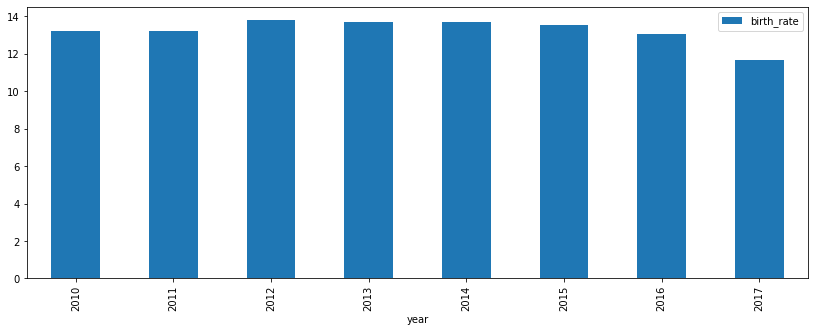

In [8]:
# Bar plot based on year and birth rate
readfile_df.groupby('year').agg({'birth_rate': 'mean'}).plot.bar(figsize=(14,5))
plt.savefig("russiandemography/birthratevsYear.png")
plt.show()



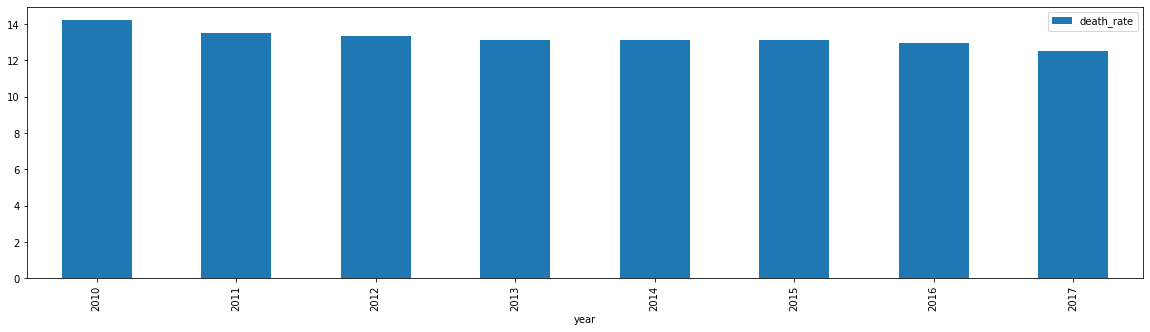

In [9]:
# Bar plot based on region and death rate
readfile_df.groupby(['year']).agg({'death_rate': 'mean'}).plot.bar(figsize=(20,5))
plt.savefig("russiandemography/deathratevsYear.png")
plt.show()


In [10]:
readfile_df["difference"] = readfile_df["birth_rate"]-readfile_df["death_rate"]
readfile_df["difference"]

C:\Users\19803\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1700   -1.2
1701   -2.3
1702   -1.5
1703   -2.2
1704    0.7
       ... 
2375   -1.3
2376    3.7
2377    6.4
2378    9.1
2379   -4.7
Name: difference, Length: 680, dtype: float64

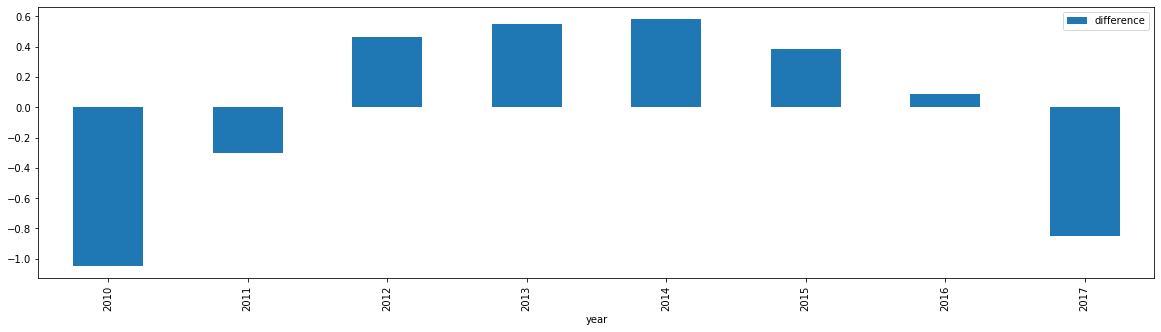

In [11]:
# plotting the difference to get the population increase or decrease over the years
readfile_df.groupby(['year']).agg({'difference': 'mean'}).plot.bar(figsize=(20,5))
plt.savefig("russiandemography/DifferencevsYear.png")
plt.show()


In [12]:
# the above plotting shows the trend. The population is on the increase during the year 1990 but it started to decrease 
#in 1991 and 1992.It started to grow in the negative from 1993 to 2011. in 2012 it started to increase but started to
#decrease in 2017.
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population,difference
1700,2010,Republic of Adygea,-1.2,12.9,14.1,1.535,1531781.0,-1.2
1701,2010,Altai Krai,-2.3,12.7,15.0,-3.255,1286540.0,-2.3
1702,2010,Amur Oblast,-1.5,13.8,15.3,-5.992,969736.0,-1.5
1703,2010,Arkhangelsk Oblast,-2.0,12.4,14.6,-8.207,1449773.0,-2.2
1704,2010,Astrakhan Oblast,0.7,14.2,13.5,-1.969,2614165.0,0.7


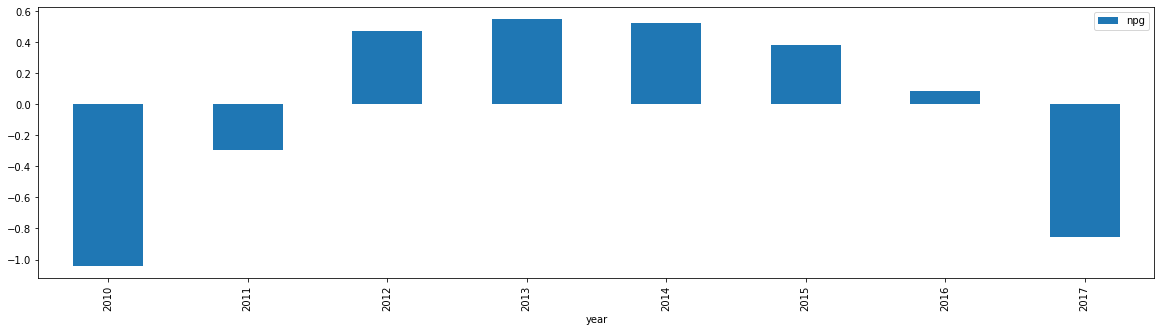

In [13]:
#check the natural population growth per 1000 people
readfile_df.groupby(['year']).agg({'npg': 'mean'}).plot.bar(figsize=(20,5))
plt.savefig("russiandemography/NPGvsYear.png")
plt.show()


In [14]:
# the above graph shows the trend of npg over the years. it looks similar to that of difference in the above graph.

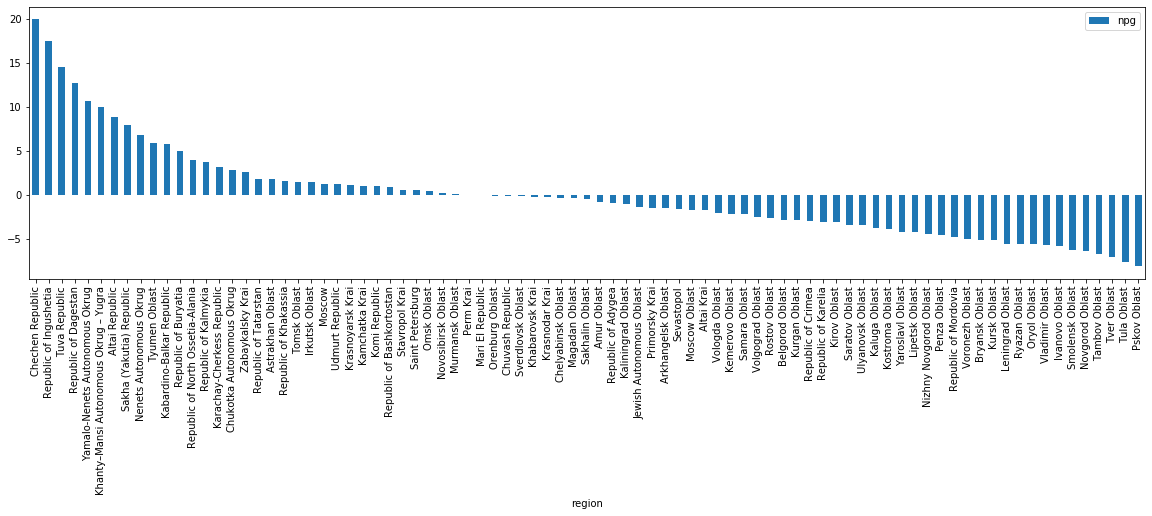

In [15]:
#Create a bar chart analysis based on npg and region and sort based on npg to understand how the trend is over the region
readfile_df.groupby(['region']).agg({'npg': 'mean'}).sort_values(by='npg',ascending=False).plot.bar(figsize=(20,5))
plt.savefig("russiandemography/NPGvsRegion.png")
plt.show()


In [16]:
# the above graph shows the max npg is on chechen Republic and the least is at Pskov Oblast.There is no considerable
#change in the npg for the region kamchatka krai. 

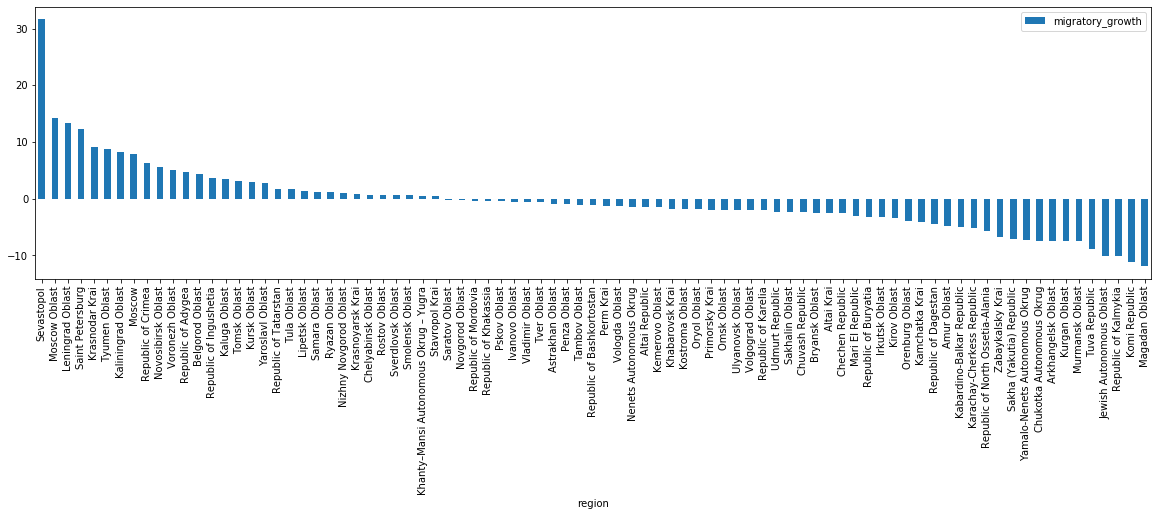

In [17]:
# lets do migratory growth to analyse
readfile_df.groupby(['region']).agg({'migratory_growth': 'mean'}).sort_values(by='migratory_growth',ascending=False).plot.bar(figsize=(20,5))
plt.savefig("russiandemography/MigratoryGrowthvsRegion.png")
plt.show()


In [18]:
# the migratory growth graph shows that there is no migration happened or neglible on few regions or it could also mean
# the file has null values. 



In [19]:
# updated dataframe with the difference
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population,difference
1700,2010,Republic of Adygea,-1.2,12.9,14.1,1.535,1531781.0,-1.2
1701,2010,Altai Krai,-2.3,12.7,15.0,-3.255,1286540.0,-2.3
1702,2010,Amur Oblast,-1.5,13.8,15.3,-5.992,969736.0,-1.5
1703,2010,Arkhangelsk Oblast,-2.0,12.4,14.6,-8.207,1449773.0,-2.2
1704,2010,Astrakhan Oblast,0.7,14.2,13.5,-1.969,2614165.0,0.7


In [20]:
# get top 10 regions with most population
top10regionpopulation = readfile_df.groupby('region').agg({'population': 'sum'}).sort_values(by="population",ascending=False)[:10]
arraytop10regionpopulation = top10regionpopulation.index.values
arraytop10regionpopulation

array(['Krasnodar Krai', 'Krasnoyarsk Krai', 'Kursk Oblast',
       'Penza Oblast', 'Pskov Oblast', 'Kabardino-Balkar Republic',
       'Samara Oblast', 'Perm Krai', 'Republic of Crimea',
       'Chuvash Republic'], dtype=object)

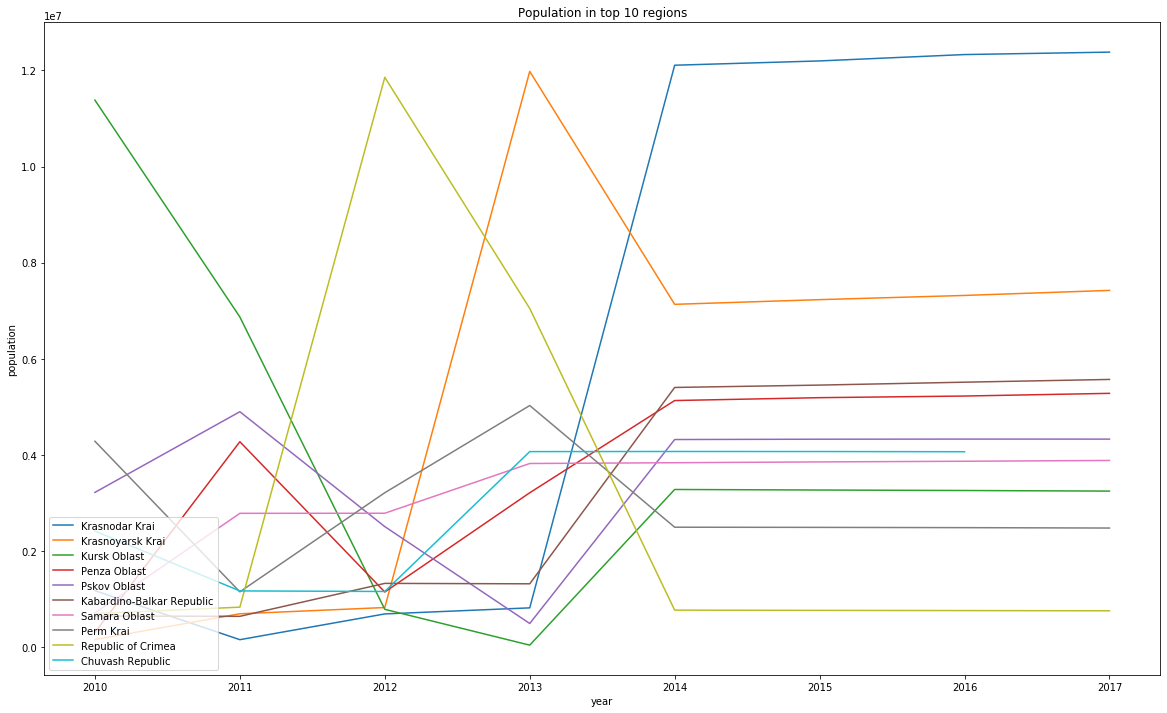

In [21]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html - this link is for lineplot.
import seaborn as sns
plt.figure(figsize=(20,12))
for x in arraytop10regionpopulation:
    sns.lineplot((readfile_df.groupby('region').get_group(x)['year']),
                 (readfile_df.groupby('region').get_group(x)['population']),label=x)

plt.legend(loc='lower left')
plt.title("Population in top 10 regions")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("russiandemography/top10regionpopulation.png")
plt.show()



In [22]:
# Based on the above graph the population in the top 10 cities starts to decline in 2005 and gets its peak sometime around 2008
#and gets down in 2011 and starts its peak sometime in 2014. after 2015 the rate is steady.
#Moscow being the captial continues the population growth but the decline happens after 2005 and has not increased in great number
#after that. But Krasnoyarsk Krai sees the population growth peak after 2010. This could be because of migration.
# the comparison of moscow with krasnoyarsk krai region based on migration growth would give us more info. 

In [23]:
# get the death rate range in top 10 regions 
top10deathrateregion = readfile_df.groupby('region').agg({'death_rate': 'sum'}).sort_values(by="death_rate",ascending=False)[:10]
arraytop10deathrateregion = top10deathrateregion.index.values
arraytop10deathrateregion

array(['Pskov Oblast', 'Tver Oblast', 'Novgorod Oblast', 'Tula Oblast',
       'Vladimir Oblast', 'Ivanovo Oblast', 'Smolensk Oblast',
       'Kursk Oblast', 'Oryol Oblast', 'Ryazan Oblast'], dtype=object)

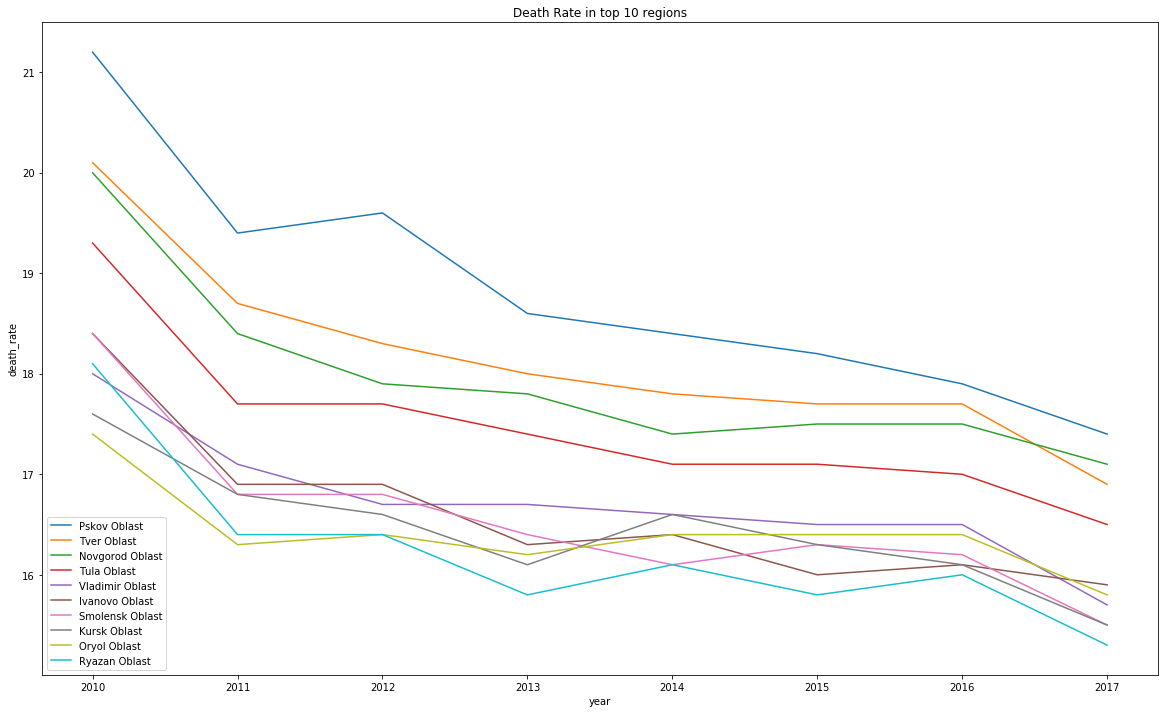

In [24]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html - this link is for lineplot.
import seaborn as sns
plt.figure(figsize=(20,12))
for x in arraytop10deathrateregion:
    sns.lineplot((readfile_df.groupby('region').get_group(x)['year']),
                 (readfile_df.groupby('region').get_group(x)['death_rate']),label=x)

plt.legend(loc='lower left')
plt.title("Death Rate in top 10 regions")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("russiandemography/top10deathrateregion.png")
plt.show()

In [25]:
# Based on the above graph the region Pskov Oblast has the highest death rate and it started to decline after 2015.

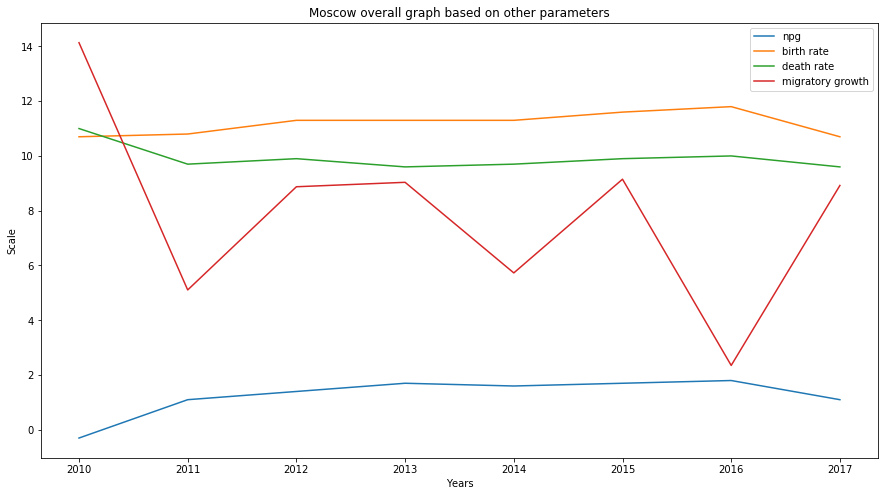

In [26]:
# moscow overall performance over these years
moscow = readfile_df.groupby('region').get_group('Moscow')
plt.figure(figsize=(15,8))
sns.lineplot(moscow['year'], moscow['npg'], label="npg")
sns.lineplot(moscow['year'], moscow['birth_rate'], label="birth rate")
sns.lineplot(moscow['year'], moscow['death_rate'], label="death rate")
sns.lineplot(moscow['year'], moscow['migratory_growth'], label="migratory growth")
plt.title('Moscow overall graph based on other parameters')
plt.xlabel("Years")
plt.ylabel("Scale")
plt.legend(loc='upper right')

In [27]:
#based on the above graph the migratory growth is at peak which matches population chart,
#birth rate has been steady, the npg has been rising since 2005 and continues to be steady after 2010. 

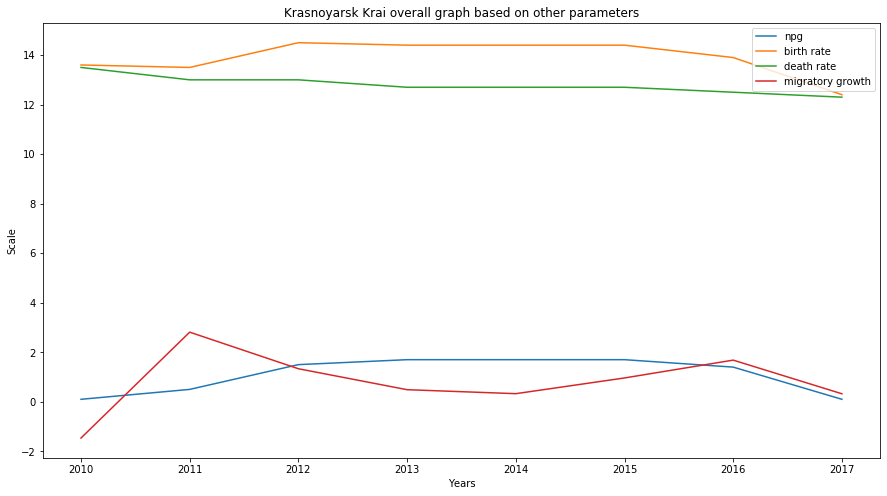

In [28]:
# Krasnoyarsk Krai overall performance over these years
Krasnoyarsk_Krai = readfile_df.groupby('region').get_group('Krasnoyarsk Krai')
plt.figure(figsize=(15,8))
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['npg'], label="npg")
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['birth_rate'], label="birth rate")
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['death_rate'], label="death rate")
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['migratory_growth'], label="migratory growth")
plt.title('Krasnoyarsk Krai overall graph based on other parameters')
plt.xlabel("Years")
plt.ylabel("Scale")
plt.legend(loc='upper right')
plt.show()

In [29]:
# Krasnoyarsk_Krai has seen a npg growth spurt after 2005 and has been on the upper hand after that.
# the birth rate has always been higher compared to moscow during the npg spurt
# the death rate seems to be same as that of moscow
# migratory growth of moscow starts to decrease in 2005 where as Krasnoyarsk_Krai showed increase.
# this could be the reason for the population peak after 2010. 

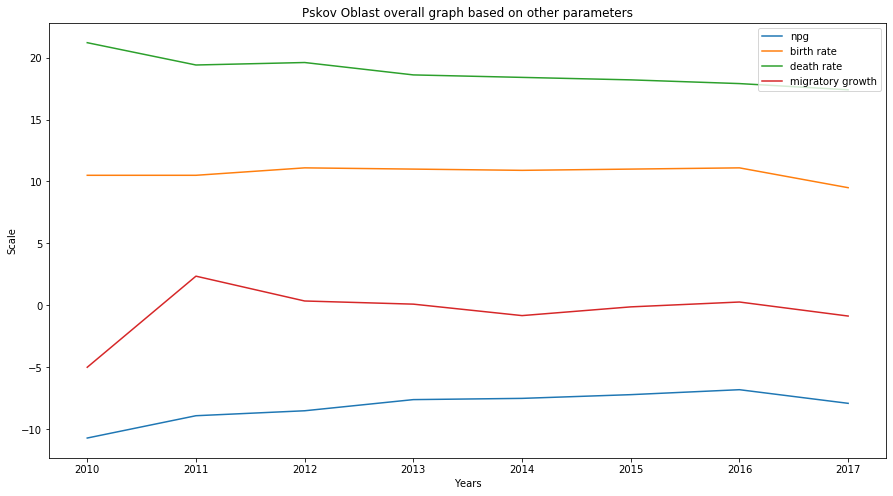

In [30]:
# Pskov Oblast overall performance over these years
Pskov_Oblast = readfile_df.groupby('region').get_group('Pskov Oblast')
plt.figure(figsize=(15,8))
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['npg'], label="npg")
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['birth_rate'], label="birth rate")
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['death_rate'], label="death rate")
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['migratory_growth'], label="migratory growth")
plt.title('Pskov Oblast overall graph based on other parameters')
plt.xlabel("Years")
plt.ylabel("Scale")
plt.legend(loc='upper right')
plt.show()

In [31]:
# Based on the above graph Pskov Oblast has the highest death rate. Not many people are migrating to this region
# and the npg has hit sub zero and did not see any rise. 

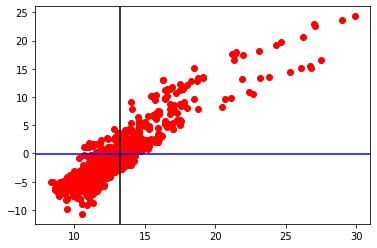

In [32]:
# Scatter plot analysis of birthrate and npgmean
plt.scatter(readfile_df.birth_rate,readfile_df.npg, color="red")
birthratemean = readfile_df.birth_rate.mean()
npgmean = readfile_df.npg.mean()
plt.axvline(birthratemean,color='black')
plt.axhline(npgmean,color='blue')
plt.show()

In [33]:
#mean birth rate
birthratemean = readfile_df.birth_rate.mean()
birthratemean

13.22633928571428

In [34]:
#npgmean
npgmean = readfile_df.npg.mean()
npgmean

-0.022321428571428572

In [35]:
deathratemean = readfile_df.death_rate.mean()
deathratemean

13.246119402985057

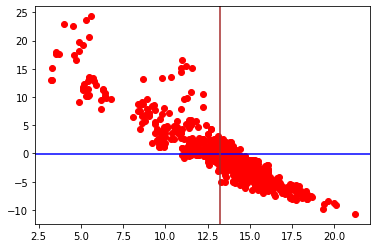

In [36]:
# Scatter plot analysis of death rate and npgmean
plt.scatter(readfile_df.death_rate,readfile_df.npg, color="red")
deathratemean = readfile_df.death_rate.mean()
npgmean = readfile_df.npg.mean()
plt.axhline(npgmean,color='blue')
plt.axvline(deathratemean,color='brown')
plt.show()

In [37]:
# get correlation
readfile_df.corr(method ='pearson')

# Findings:the birthrate mean and npg shows positive results where as the scatter plot for deathrate and npg
#shows negative result

,year,npg,birth_rate,death_rate,migratory_growth,population,difference
year,1.000000,0.014121,-0.116256,-0.144371,0.038476,0.004762,0.014767
npg,0.014121,1.000000,0.912176,-0.910543,-0.196878,-0.072810,0.999991
birth_rate,-0.116256,0.912176,1.000000,-0.661308,-0.224894,-0.075100,0.912315
death_rate,-0.144371,-0.910543,-0.661308,1.000000,0.133729,0.058653,-0.910485
migratory_growth,0.038476,-0.196878,-0.224894,0.133729,1.000000,0.040979,-0.196988
population,0.004762,-0.072810,-0.075100,0.058653,0.040979,1.000000,-0.073292
difference,0.014767,0.999991,0.912315,-0.910485,-0.196988,-0.073292,1.000000


In [38]:
# lets use another method
readfile_df.corr(method ='kendall')

,year,npg,birth_rate,death_rate,migratory_growth,population,difference
year,1.000000,0.030546,-0.077532,-0.123519,0.013099,-0.008203,0.030883
npg,0.030546,1.000000,0.713803,-0.761396,-0.177521,-0.035376,0.998480
birth_rate,-0.077532,0.713803,1.000000,-0.467259,-0.188762,-0.079217,0.713371
death_rate,-0.123519,-0.761396,-0.467259,1.000000,0.127813,0.003171,-0.760255
migratory_growth,0.013099,-0.177521,-0.188762,0.127813,1.000000,0.028062,-0.176981
population,-0.008203,-0.035376,-0.079217,0.003171,0.028062,1.000000,-0.035906
difference,0.030883,0.998480,0.713371,-0.760255,-0.176981,-0.035906,1.000000


In [39]:
# the different methods of correlation produces different result values but overall birth rate and npg shows positive whereas
#death rate and npg is negative.

In [40]:
populationregion = readfile_df.groupby('year').agg({'population': 'sum'}).sort_values(by="year",ascending=True)
populationregion.head()
# make horizontal bar chart

,population
year,
2010,142803644.0
2011,145636874.0
2012,143023345.0
2013,145715221.0
2014,143651815.0


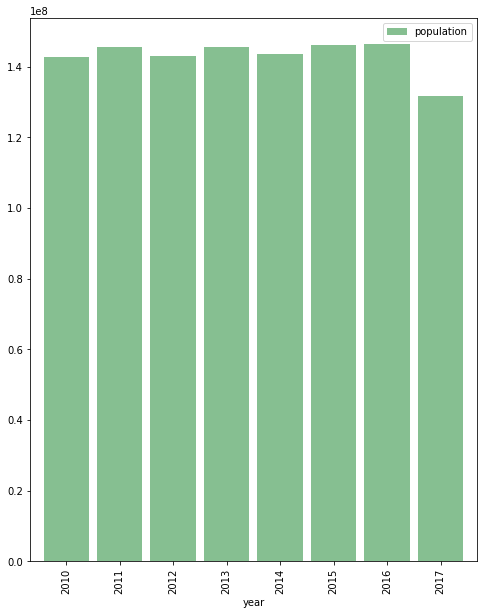

In [41]:
populationregion1 =populationregion.plot(kind ='bar',figsize=(8, 10), color='#86BF91', zorder=2, width=0.85)

#populationregion without xlimit 

(131000000, 153836638.2)

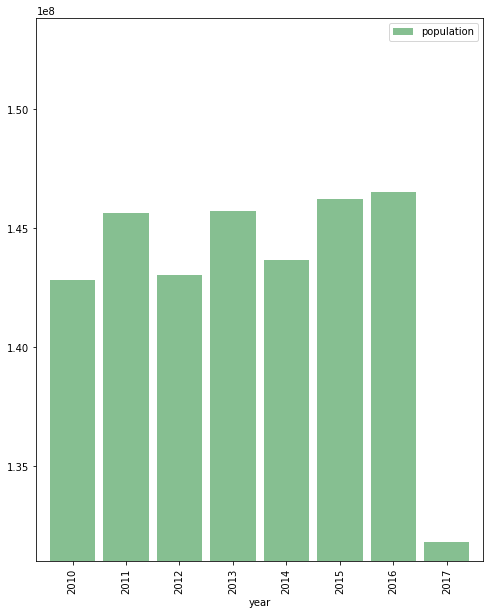

In [42]:
populationregion = populationregion.plot(kind ='bar',figsize=(8, 10), color='#86BF91', zorder=2, width=0.85)
ylim = populationregion.set_ylim
ylim(bottom=131000000) 
#plt.show()

In [43]:
readfile_pivot = readfile_df.pivot(index ='year', columns ='region',values=['npg'])['npg']
readfile_pivot

# select three columns from gapminder dataframe
#df1 = readfile_df[['region', 'year','npg']]
# pivot table example with three columns
#pd.pivot_table(df1, values='year', 
#                     index=['npg'], 
#                    columns='region',
#                    aggfunc=min
#             )



region,Altai Krai,Altai Republic,Amur Oblast,Arkhangelsk Oblast,Astrakhan Oblast,Belgorod Oblast,Bryansk Oblast,Chechen Republic,Chelyabinsk Oblast,Chukotka Autonomous Okrug,...,Tyumen Oblast,Udmurt Republic,Ulyanovsk Oblast,Vladimir Oblast,Volgograd Oblast,Vologda Oblast,Voronezh Oblast,Yamalo-Nenets Autonomous Okrug,Yaroslavl Oblast,Zabaykalsky Krai
year,,,,,,,,,,,,,,,,,,,,,
2010,-2.3,8.3,-1.5,-2.0,0.7,-3.5,-6.3,24.3,-1.0,0.9,...,7.1,0.3,-5.1,-7.2,-3.4,-4.2,-6.8,10.3,-6.0,2.1
2011,-1.9,10.5,-1.2,-1.7,1.2,-3.0,-5.2,23.7,-0.6,2.5,...,7.6,1.0,-4.0,-6.2,-2.6,-2.7,-5.7,10.2,-4.7,2.2
2012,-0.9,10.9,-0.4,-0.8,2.4,-2.4,-4.8,20.7,0.2,2.6,...,8.8,2.4,-2.7,-5.2,-1.9,-1.1,-4.7,11.4,-4.0,3.1
2013,-0.8,9.8,0.2,-0.7,2.6,-2.2,-4.8,19.8,0.2,2.6,...,5.1,1.9,-2.8,-5.6,-2.0,-1.2,-4.8,11.5,-3.7,3.4
2014,-1.0,9.6,-0.2,-0.9,2.3,-2.5,-5.0,19.2,0.4,2.8,...,5.4,1.7,-2.7,-5.4,-2.1,-1.2,-4.8,11.8,-3.6,3.5
2015,-1.5,7.9,-0.6,-1.4,2.2,-2.4,-4.4,18.2,0.0,4.1,...,5.2,1.7,-3.0,-4.9,-2.3,-1.1,-4.2,11.3,-3.4,2.5
2016,-2.0,8.1,-0.8,-1.9,2.0,-2.8,-4.7,16.6,-0.3,3.6,...,4.5,1.2,-3.2,-5.3,-2.5,-1.7,-4.5,10.1,-3.6,2.3
2017,-3.2,6.1,-1.6,-2.7,0.7,-3.8,-5.8,17.4,-1.5,3.7,...,3.5,-0.2,-3.9,-6.0,-3.1,-3.0,-5.0,9.1,-4.7,1.7


In [44]:
readfile_pivot

region,Altai Krai,Altai Republic,Amur Oblast,Arkhangelsk Oblast,Astrakhan Oblast,Belgorod Oblast,Bryansk Oblast,Chechen Republic,Chelyabinsk Oblast,Chukotka Autonomous Okrug,...,Tyumen Oblast,Udmurt Republic,Ulyanovsk Oblast,Vladimir Oblast,Volgograd Oblast,Vologda Oblast,Voronezh Oblast,Yamalo-Nenets Autonomous Okrug,Yaroslavl Oblast,Zabaykalsky Krai
year,,,,,,,,,,,,,,,,,,,,,
2010,-2.3,8.3,-1.5,-2.0,0.7,-3.5,-6.3,24.3,-1.0,0.9,...,7.1,0.3,-5.1,-7.2,-3.4,-4.2,-6.8,10.3,-6.0,2.1
2011,-1.9,10.5,-1.2,-1.7,1.2,-3.0,-5.2,23.7,-0.6,2.5,...,7.6,1.0,-4.0,-6.2,-2.6,-2.7,-5.7,10.2,-4.7,2.2
2012,-0.9,10.9,-0.4,-0.8,2.4,-2.4,-4.8,20.7,0.2,2.6,...,8.8,2.4,-2.7,-5.2,-1.9,-1.1,-4.7,11.4,-4.0,3.1
2013,-0.8,9.8,0.2,-0.7,2.6,-2.2,-4.8,19.8,0.2,2.6,...,5.1,1.9,-2.8,-5.6,-2.0,-1.2,-4.8,11.5,-3.7,3.4
2014,-1.0,9.6,-0.2,-0.9,2.3,-2.5,-5.0,19.2,0.4,2.8,...,5.4,1.7,-2.7,-5.4,-2.1,-1.2,-4.8,11.8,-3.6,3.5
2015,-1.5,7.9,-0.6,-1.4,2.2,-2.4,-4.4,18.2,0.0,4.1,...,5.2,1.7,-3.0,-4.9,-2.3,-1.1,-4.2,11.3,-3.4,2.5
2016,-2.0,8.1,-0.8,-1.9,2.0,-2.8,-4.7,16.6,-0.3,3.6,...,4.5,1.2,-3.2,-5.3,-2.5,-1.7,-4.5,10.1,-3.6,2.3
2017,-3.2,6.1,-1.6,-2.7,0.7,-3.8,-5.8,17.4,-1.5,3.7,...,3.5,-0.2,-3.9,-6.0,-3.1,-3.0,-5.0,9.1,-4.7,1.7


In [45]:

trend_difference = readfile_pivot.T[readfile_pivot.index[-1]] - readfile_pivot.T[readfile_pivot.index[0]]
trend_pct = (trend_difference / readfile_pivot.T[readfile_pivot.index[0]] * 100)
trend_pct
type(trend_pct)
#trendpct = pd.DataFrame(trend_pct)
trendpct = pd.DataFrame({'npg':trend_pct})
trendpct = trendpct.sort_values(by = 'npg', ascending = False)
trendpct
#trend_pct['Pivot'] = trend_pct.apply(axis = 1) 
#trend_pct.to_csv("c:\Desktop\pandas.csv", index=True, header=True)

,npg
region,
Chukotka Autonomous Okrug,311.111111
Murmansk Oblast,300.000000
Orenburg Oblast,240.000000
Omsk Oblast,100.000000
Republic of Adygea,66.666667
...,...
Kamchatka Krai,-250.000000
Moscow,-466.666667
Republic of Tatarstan,-650.000000


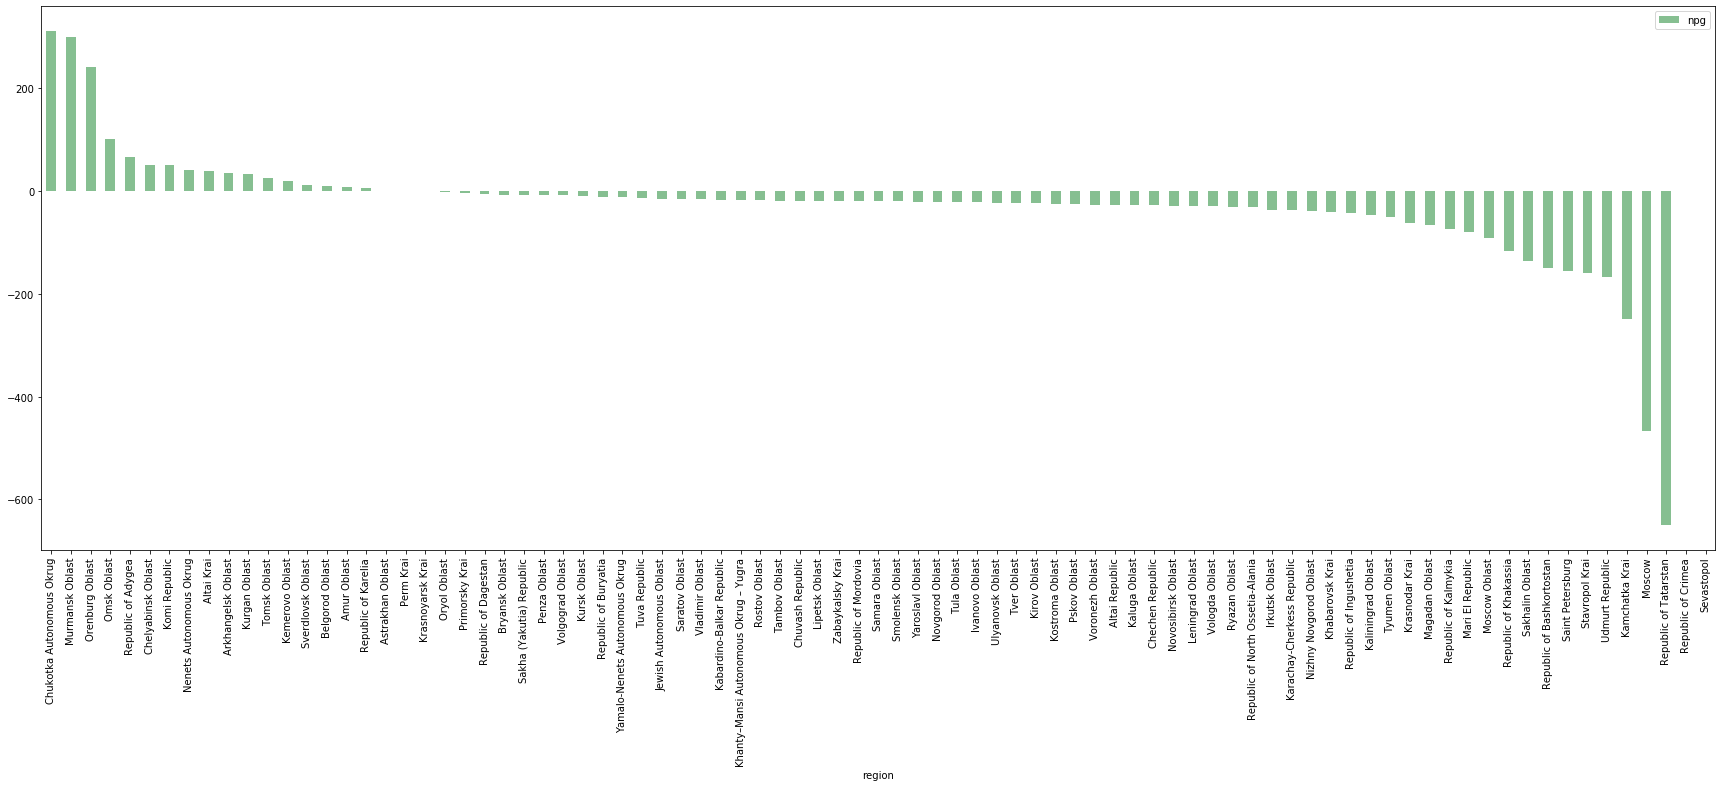

In [46]:
trendpct.plot(kind='bar', figsize=(30, 10),color='#86BF91')

In [47]:
#trendpct.loc['0'] > 0

trendingpositive = trendpct.loc[trendpct['npg'] > 0]
trendingpositive

,npg
region,
Chukotka Autonomous Okrug,311.111111
Murmansk Oblast,300.000000
Orenburg Oblast,240.000000
Omsk Oblast,100.000000
Republic of Adygea,66.666667
Chelyabinsk Oblast,50.000000
Komi Republic,50.000000
Nenets Autonomous Okrug,40.425532
Altai Krai,39.130435


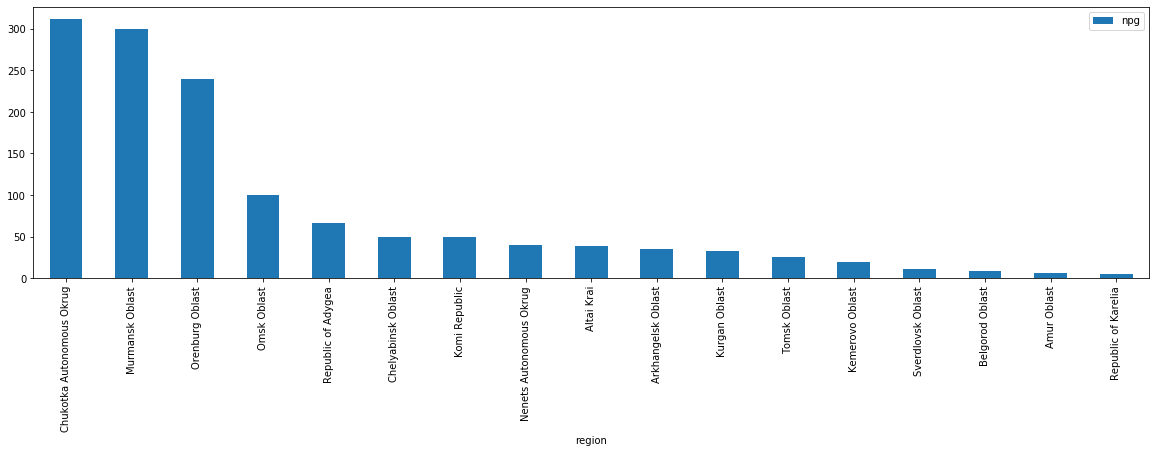

In [48]:
trendingpositive.plot.bar(figsize=(20,5))
plt.savefig("russiandemography/TrendingPositive.png")
plt.show()



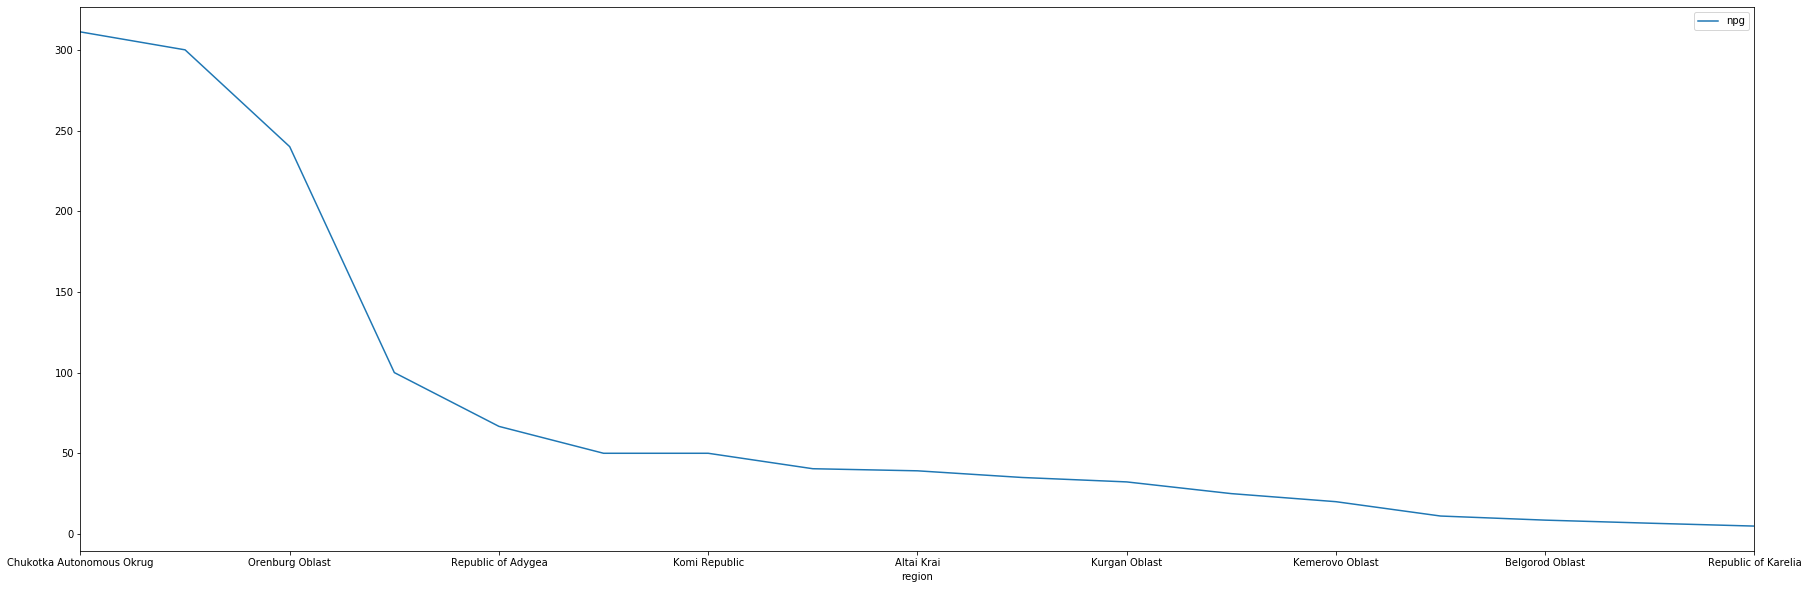

In [49]:
trendingpositive.plot(kind = 'line',figsize=(30, 10))
plt.savefig("russiandemography/Line_TrendingPositive.png")
plt.show()



In [50]:
#Trending negative

trendingnegative = trendpct.loc[trendpct['npg'] <= 0]
trendingnegative

,npg
region,
Astrakhan Oblast,0.000000
Perm Krai,-0.000000
Krasnoyarsk Krai,0.000000
Oryol Oblast,-1.562500
Primorsky Krai,-4.000000
...,...
Stavropol Krai,-160.000000
Udmurt Republic,-166.666667
Kamchatka Krai,-250.000000


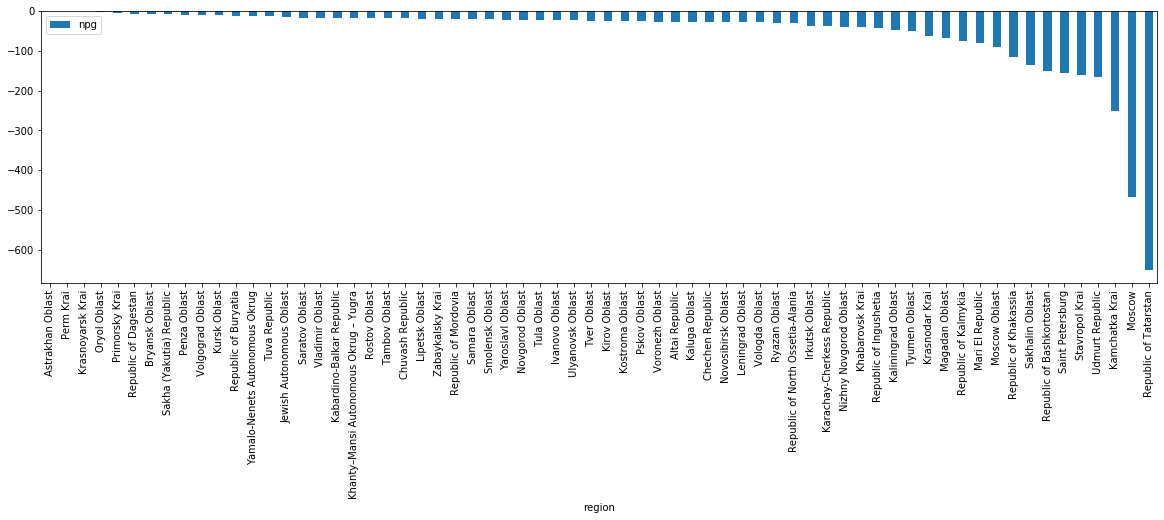

In [51]:
trendingnegative.plot.bar(figsize=(20,5))
plt.savefig("russiandemography/TrendingNegative.png")
plt.show()


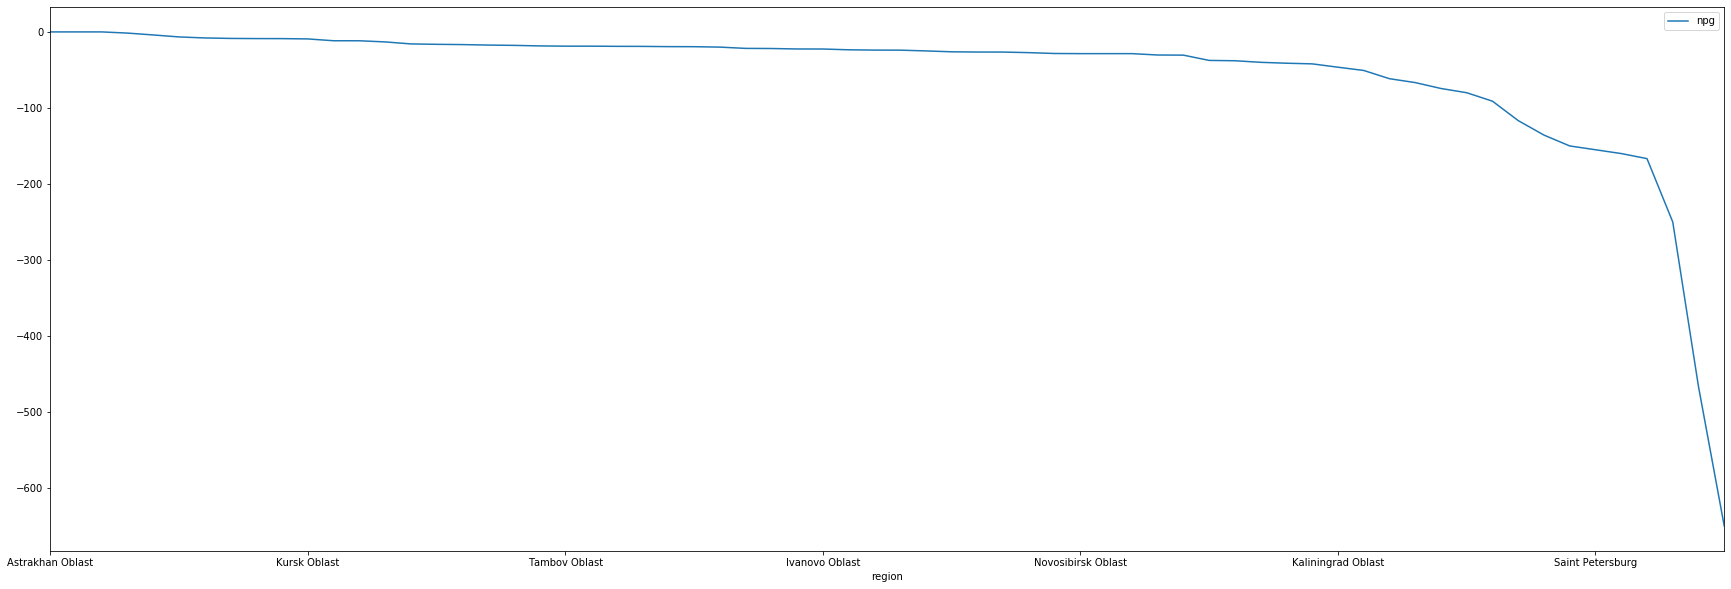

In [52]:
trendingnegative.plot(kind = 'line',figsize=(30, 10))
plt.savefig("russiandemography/Line_TrendingNegative.png")
plt.show()
